<a href="https://colab.research.google.com/github/LPATROCINIO1969/deeplearning/blob/main/pratica01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy   #importa biblioteca para manipulação de matrizes
from matplotlib import pyplot as plt  #importa biblioteca para criação de gráficos

# inicio das importações de classes do keras (modelo de deep learning)
from keras.datasets import mnist        #importa datasets mnist
from keras.models import Sequential     #importa modelo sequencial de rede neural
from keras.layers import Dense, InputLayer          #importa camadas totalmente conectadas
from keras.layers import Dropout        #importa a estrutura de dropout 
from keras.utils import np_utils        #importa biblioteca de utilidade do keras

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


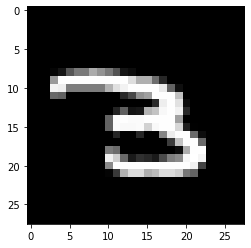

3


In [ ]:
(X_train,y_train),(X_test, y_test)=mnist.load_data()  #importa o dataset mnist da biblioteca do Keras
print(X_train.shape)        # imprime o tamanho do vetor
first_image = X_train[250]  # obtém a imagem de treino no índice 100 do vetor
# Realiza manipulação dos dados da imagem
first_image = numpy.array(first_image,dtype = 'float')
pixels = first_image.reshape((28,28))
# exibe a imagem do vetor
plt.imshow(pixels, cmap='gray')
plt.show()

print(y_train[250])   #imprime a classe da imagem de treino de indice 100

In [ ]:
num_pixels = X_train.shape[1]*X_train.shape[2]   #calcula o total de pixels da imagem
print(num_pixels)

# transforma o valor dos pixels para float 32
X_train2 = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

#normalizando os valores dos pixels para o intervalo 0 a 1.
X_train2 = X_train2/255
X_test2 = X_test2/255


784


In [ ]:
y_train_h = np_utils.to_categorical(y_train)
y_test_h = np_utils.to_categorical(y_test)

# determina o número de classes do problema
num_classes = y_test_h.shape[1]

print(num_pixels)
print(y_train_h[250])
print(y_test_h[250])

784
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# cria um modelo do tipo sequencial (feedforward)
model = Sequential()
model.add(InputLayer(input_shape=num_pixels))                             # Cria a camada de entrada
model.add(Dense(1024, kernel_initializer='normal', activation='relu'))    # Cria a primeira camada oculta da rede
model.add(Dense(2048, kernel_initializer='normal', activation='relu'))    # Cria a segunda camada oculta da rede
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))   # Cria a camada de saída
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20490     
Total params: 2,923,530
Trainable params: 2,923,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
result = model.fit(X_train2,y_train_h,validation_data=(X_test2,y_test_h), epochs=20, verbose=1, batch_size = 100)   #executa o treinamento da rede

Epoch 1/20
600/600 [==============================] - 5s 7ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.2803 - val_accuracy: 0.9802
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0164 - accuracy: 0.9977 - val_loss: 0.2516 - val_accuracy: 0.9821
Epoch 3/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0095 - accuracy: 0.9988 - val_loss: 0.2127 - val_accuracy: 0.9836
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.2516 - val_accuracy: 0.9823
Epoch 5/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0112 - accuracy: 0.9983 - val_loss: 0.2647 - val_accuracy: 0.9825
Epoch 6/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0143 - accuracy: 0.9982 - val_loss: 0.2545 - val_accuracy: 0.9830
Epoch 7/20
600/600 [==============================] - 4s 6ms/step - loss: 0.0088 - accuracy: 0.9987 - val_loss: 0.2753 - val_accuracy: 0.9824
Epoch 

In [ ]:
x = X_train2[50]
x = numpy.expand_dims(x, axis=0)
print(model.predict(x))
print(numpy.argmax(model.predict(x)))

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
3
